## Car Price Prediction Using Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


**Using describe().T function to show the dataset in transpose manner meaning making rows into columns and vice versa**   

Cleaning Data

In [7]:
data = data.drop('Car_Name', axis=1)
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
data['Year_Old'] = 2022 - data['Year']
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [9]:
data = data.drop('Year', axis=1)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


**There are a few categorical variables present in data which can be proccessed using One Hot Encoding, This can be achieved by using the get_dummies function present in pandas library. N-1 Dummy variables are created** 

In [10]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Year_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


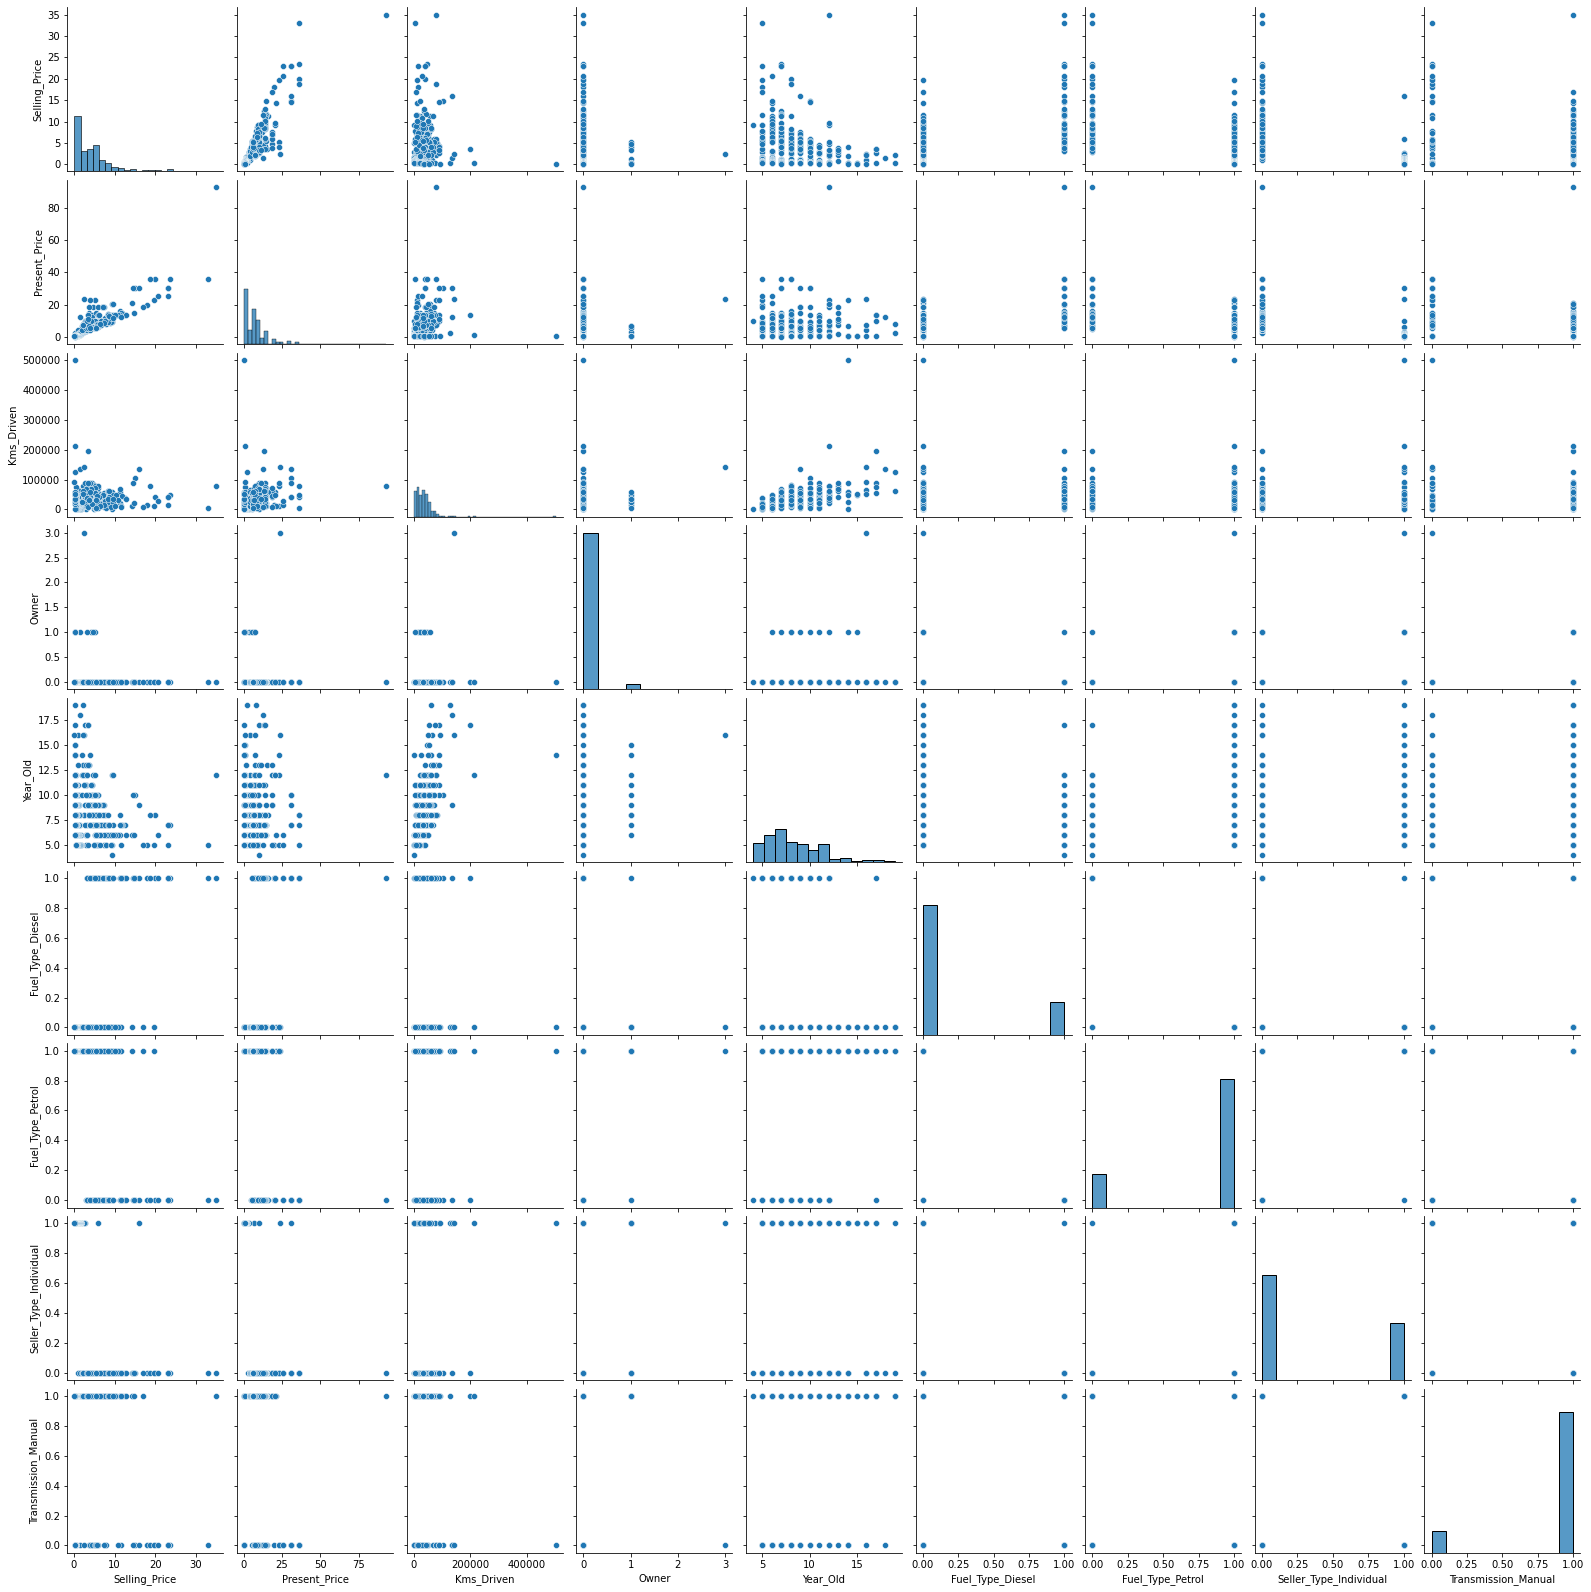

In [11]:
sns.pairplot(data)

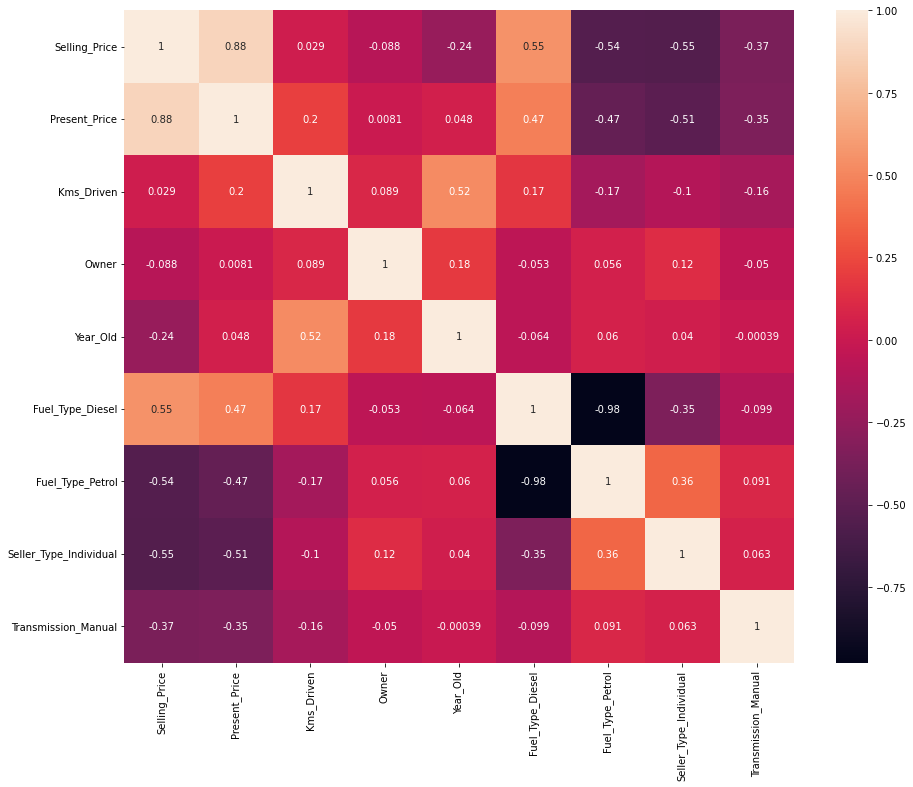

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [15]:
X = data.drop("Selling_Price", axis=1)
y = data.Selling_Price
print(X.shape)
print(y.shape)

(301, 8)
(301,)


**We are using ExtraTrees Regressor for picking out the important features**

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [19]:
model.feature_importances_

array([0.39472745, 0.04111359, 0.00095458, 0.07414507, 0.21798915,
       0.01279177, 0.12093766, 0.13734074])

<AxesSubplot:>

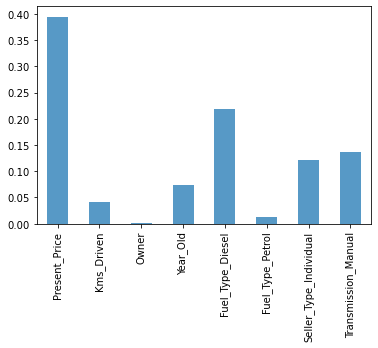

In [21]:
pd.Series(model.feature_importances_, index = X.columns).plot(kind='bar', alpha=0.75, rot=90)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.914434297222852

**Since there are many Regression models present we can compare the model performance in order to select the best working model for the given data and problem statement**

In [32]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)

In [33]:
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.9144343 , 0.81157191, 0.82958652, 0.84584462, 0.85555828])

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [45]:
def best_model(X,y):
    model_algo = {
        'Linear_Regression':{
            'model': LinearRegression(),
            'params': {
                'normalize':[True, False]
            }
        },
        
        'Decision_Tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse','mae'],
                'splitter': ['best','random'],
                'max_depth':[x for x in range(5,35,5)],
                'min_samples_leaf': [1,2,5,10]
                
            }
        },
        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [x for x in range(20,150,20)],
                'max_features': ['auto','sqrt'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10, 15, 100],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        }
        
    }
    
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs = RandomizedSearchCV(config['model'],config['params'], cv=cv, return_train_score=False, n_iter=5)
        rs.fit(X_train,y_train)
        score.append({
            'model': algo_name,
            'best_score': rs.best_score_,
            'best_params': rs.best_params_
        })
        
    result = pd.DataFrame(score, columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result

In [46]:
best_model(X,y)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' wa

[{'normalize': False}, {'splitter': 'best', 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'mae'}, {'n_estimators': 80, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 15}]


,model,best_score,best_params
0,Linear_Regression,0.850996,{'normalize': False}
1,Decision_Tree,0.916994,"{'splitter': 'best', 'min_samples_leaf': 1, 'm..."
2,Random_forest,0.889032,"{'n_estimators': 80, 'min_samples_split': 15, ..."


In [47]:
final_dec_model = DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae')
final_dec_model.fit(X_train,y_train)
final_dec_model.score(X_test,y_test)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


0.9381488043242215

In [48]:
final_rf_model = RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20)
final_rf_model.fit(X_train,y_train)
final_rf_model.score(X_test,y_test)

0.9582483670074212

In [49]:
cross_val_score(DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae'), X,y,cv=cv)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\tree\_classes

array([0.9393376 , 0.93137053, 0.94787739, 0.73837135, 0.90609543])

In [50]:
cross_val_score(RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20), X,y,cv=cv)

array([0.94950541, 0.91348004, 0.96925401, 0.85174966, 0.95930913])

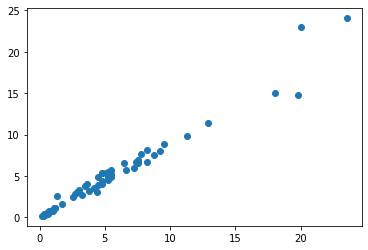

In [51]:
predictions=final_rf_model.predict(X_test)
plt.scatter(y_test,predictions)

In [52]:
import pickle
with open('RFprice_predicting_model.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(final_rf_model, file)